# Load data library

In [2]:
library(dplyr)
library(ggplot2)

## Read data
data = read.csv("assign2.txt", sep=" ")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# Define problems

Define problems:
1. H0: chimpanzee is same as human: almost always prosocial
   H1: chimpanzee is not prosocial
2. H0: Each chimpanzee is not prrosocial, i.e. no difference between having placebo or not
   H1: Each chimpanzee is prrosocial, i.e. difference between placebo set
3. H0: Chimpanzee population is not prrosocial, i.e. no difference between having placebo or not
   H1: Chimpanzee population is prrosocial, i.e. difference between placebo set

Two types of analysis
1: A binomial model of factor level
2: Test of independence

# Process Data

In [3]:
## Process data
# Create new column on if prosocial
data$pulled_prosocial = as.numeric(data$prosoc_left == data$pulled_left)
# Create new column of 1s for faster aggregation
data_ = data.frame(data)
data$const = 1
# Aggregate data based on each individual
data.aggregated = aggregate(.~actor+condition+pulled_prosocial, sum, d=data)

In [4]:
aggregate(.~actor+condition+prosoc_left, sum, d=data)

actor,condition,prosoc_left,pulled_left,pulled_prosocial,const
1,0,0,6,12,18
2,0,0,18,0,18
3,0,0,5,13,18
4,0,0,6,12,18
5,0,0,6,12,18
6,0,0,14,4,18
7,0,0,14,4,18
1,1,0,5,13,18
2,1,0,18,0,18
3,1,0,3,15,18


In [5]:
data.aggregated

actor,condition,pulled_prosocial,prosoc_left,pulled_left,const
1,0,0,9,6,15
2,0,0,0,18,18
3,0,0,7,5,12
4,0,0,9,6,15
5,0,0,8,6,14
6,0,0,7,14,21
7,0,0,3,14,17
1,1,0,8,5,13
2,1,0,0,18,18
3,1,0,12,3,15


# Additional test for handedness

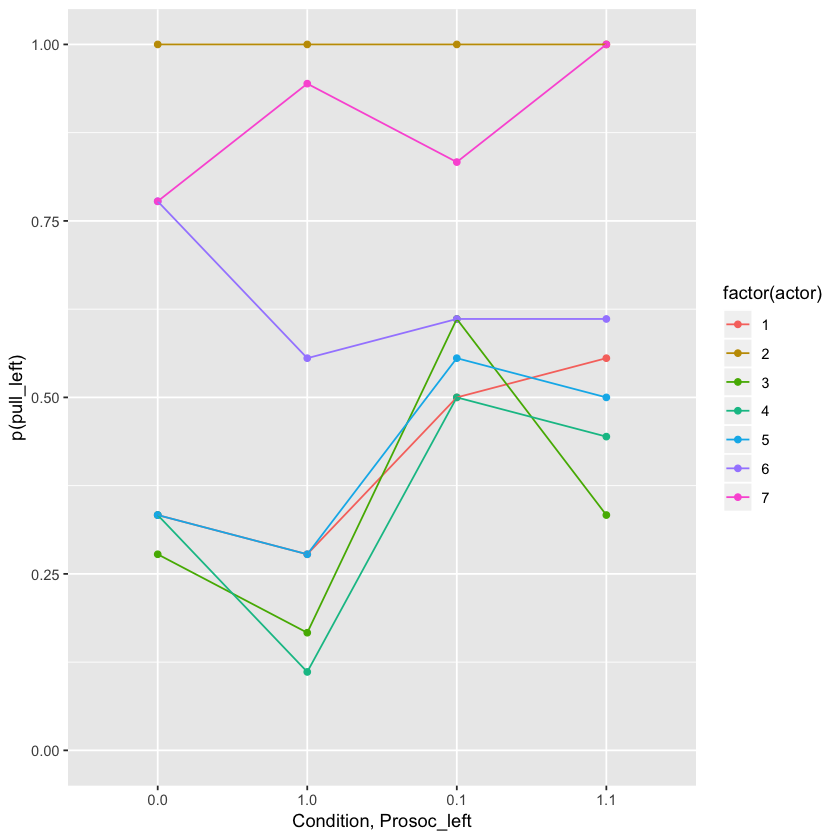

In [6]:
### Additional thing: Test for handedness
# Investigate if the side of lever the chimpanzee pulled depends on the condition*prosoc_left
## Plot 1: individual/condition*prosoc_left
ggplot(data = data,
       aes(x = interaction(factor(condition), factor(prosoc_left)), 
       y = pulled_left, colour = factor(actor),
       group=factor(actor))) +
       stat_summary(fun.y=mean, geom="point")+
       stat_summary(fun.y=mean, geom="line") + xlab("Condition, Prosoc_left") +
       ylab("p(pull_left)") + ylim(0, 1)
# Difference in individual

In [7]:
## Model
# Full model
data.handedness.bmodel = glm(pulled_left ~ factor(actor)+factor(condition)+factor(prosoc_left), data = data, family=poisson)
summary(data.handedness.bmodel)


Call:
glm(formula = pulled_left ~ factor(actor) + factor(condition) + 
    factor(prosoc_left), family = poisson, data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.43748  -0.86223  -0.03281   0.48835   1.01758  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -9.590e-01  2.020e-01  -4.747 2.07e-06 ***
factor(actor)2        8.755e-01  2.173e-01   4.029 5.61e-05 ***
factor(actor)3       -1.823e-01  2.708e-01  -0.673 0.500772    
factor(actor)4       -1.823e-01  2.708e-01  -0.673 0.500772    
factor(actor)5       -5.232e-12  2.582e-01   0.000 1.000000    
factor(actor)6        4.274e-01  2.347e-01   1.821 0.068541 .  
factor(actor)7        7.577e-01  2.213e-01   3.424 0.000616 ***
factor(condition)1   -8.224e-02  1.171e-01  -0.702 0.482647    
factor(prosoc_left)1  2.339e-01  1.178e-01   1.985 0.047125 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for

In [10]:
dim(data)

[1] 504   6

In [11]:
504/7/4

[1] 18

In [13]:
## Model
# Full model
data.handedness.bmodel = glm(cbind(18-pulled_left, pulled_left) ~ factor(actor)+factor(condition)+factor(prosoc_left), data = data, family=binomial)
summary(data.handedness.bmodel)


Call:
glm(formula = cbind(18 - pulled_left, pulled_left) ~ factor(actor) + 
    factor(condition) + factor(prosoc_left), family = binomial, 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.03395  -0.49837   0.03183   0.86729   1.45737  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           3.829e+00  2.047e-01  18.705  < 2e-16 ***
factor(actor)2       -9.097e-01  2.210e-01  -4.116 3.86e-05 ***
factor(actor)3        1.863e-01  2.737e-01   0.681  0.49608    
factor(actor)4        1.863e-01  2.737e-01   0.681  0.49608    
factor(actor)5        1.200e-14  2.613e-01   0.000  1.00000    
factor(actor)6       -4.404e-01  2.381e-01  -1.850  0.06438 .  
factor(actor)7       -7.853e-01  2.249e-01  -3.492  0.00048 ***
factor(condition)1    8.555e-02  1.195e-01   0.716  0.47396    
factor(prosoc_left)1 -2.432e-01  1.201e-01  -2.024  0.04293 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘

In [15]:
## Model
# Full model
data.handedness.bmodel = glm(pulled_left ~ factor(actor)+factor(condition)+factor(prosoc_left), data = data, family=poisson)
summary(data.handedness.bmodel)


Call:
glm(formula = pulled_left ~ factor(actor) + factor(condition) + 
    factor(prosoc_left), family = poisson, data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.43748  -0.86223  -0.03281   0.48835   1.01758  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -9.590e-01  2.020e-01  -4.747 2.07e-06 ***
factor(actor)2        8.755e-01  2.173e-01   4.029 5.61e-05 ***
factor(actor)3       -1.823e-01  2.708e-01  -0.673 0.500772    
factor(actor)4       -1.823e-01  2.708e-01  -0.673 0.500772    
factor(actor)5       -5.232e-12  2.582e-01   0.000 1.000000    
factor(actor)6        4.274e-01  2.347e-01   1.821 0.068541 .  
factor(actor)7        7.577e-01  2.213e-01   3.424 0.000616 ***
factor(condition)1   -8.224e-02  1.171e-01  -0.702 0.482647    
factor(prosoc_left)1  2.339e-01  1.178e-01   1.985 0.047125 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for

In [ ]:
## Model
# Step model
data.handedness.bmodel.step = step(data.handedness.bmodel)
summary(data.handedness.bmodel.step)
# Actor is significant, at least some of the actors are definitely handed. (1,2,7, potentially 6 to be precise)

# Plot Data

## Without regard to side

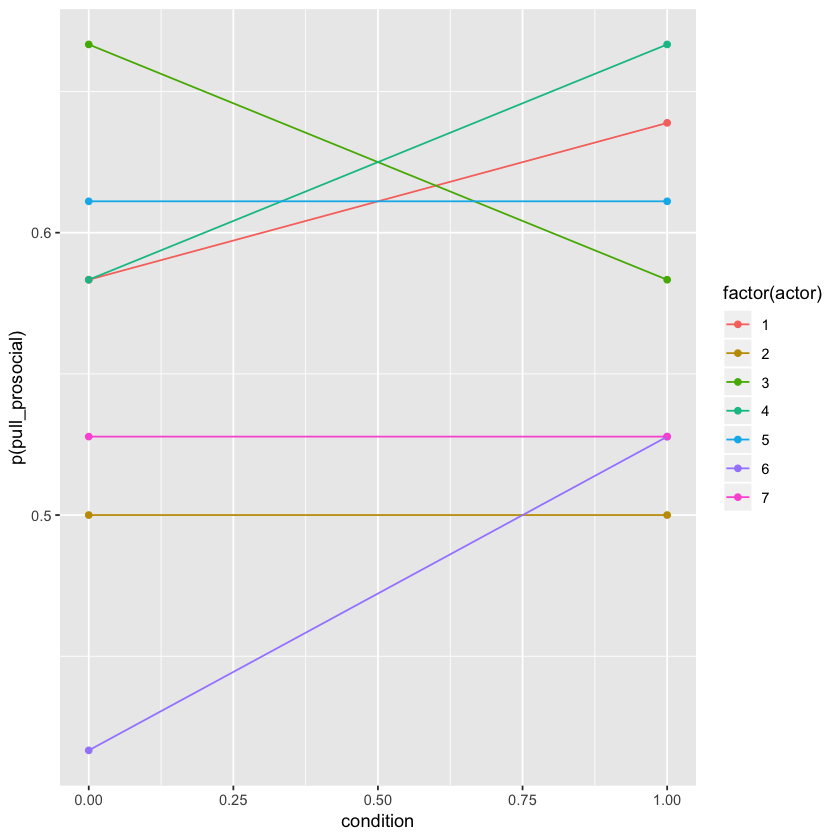

In [32]:
## Plot data
# Plot the individual plot
ggplot(data = data,
       aes(x = condition, 
       y = pulled_prosocial, colour = factor(actor),
       group=factor(actor))) +
       stat_summary(fun.y=mean, geom="point")+
       stat_summary(fun.y=mean, geom="line") + xlab("condition") +
       ylab("p(pull_prosocial)")

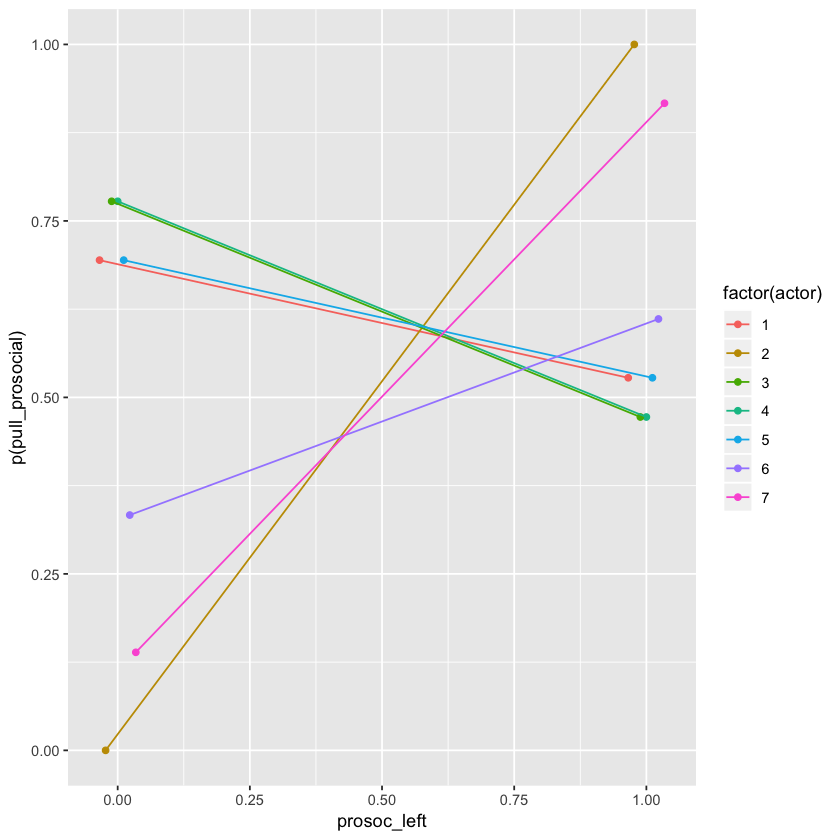

In [10]:
ggplot(data = data,
       aes(x = prosoc_left, 
       y = pulled_prosocial, colour = factor(actor),
       group=factor(actor))) +
       stat_summary(fun.y=mean, geom="point",  position=position_dodge(width=0.08))+
       stat_summary(fun.y=mean, geom="line",  position=position_dodge(width=0.08)) + 
       xlab("prosoc_left") +
       ylab("p(pull_prosocial)")

# Independence test

### Two way test

In [11]:
data.aggregated.xtabs2 <- xtabs(const ~ actor + pulled_prosocial, 
                                data = data)
summary(data.aggregated.xtabs2)

Call: xtabs(formula = const ~ actor + pulled_prosocial, data = data)
Number of cases in table: 504 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 7.518, df = 6, p-value = 0.2756

In [12]:
data.aggregated.xtabs2 <- xtabs(const ~ condition + pulled_prosocial, 
                                data = data)
summary(data.aggregated.xtabs2)

Call: xtabs(formula = const ~ condition + pulled_prosocial, data = data)
Number of cases in table: 504 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 0.29101, df = 1, p-value = 0.5896

In [13]:
data.aggregated.xtabs2 <- xtabs(const ~ pulled_left + pulled_prosocial, 
                                data = data)
summary(data.aggregated.xtabs2)

Call: xtabs(formula = const ~ pulled_left + pulled_prosocial, data = data)
Number of cases in table: 504 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 0.24153, df = 1, p-value = 0.6231

### Three way test

In [14]:
# Try independence test
# Phrase test like this:
#     Factor1: isProsocial
#     Factor2: Conditioned
#     Factor3: The chimp ID
data.aggregated.pmodel1 = glm(const ~ actor + condition + pulled_prosocial, 
                              data = data.aggregated, family=poisson)
summary(data.aggregated.pmodel1)
# Test independence
deviance(data.aggregated.pmodel1)
df.residual(data.aggregated.pmodel1)
pchisq(deviance(data.aggregated.pmodel1), 
       df=df.residual(data.aggregated.pmodel1), lower.tail = FALSE)
# Close to 1, so we conclude independent

# Use table
data.aggregated.xtabs1 <- xtabs(const ~ actor + pulled_prosocial + condition, 
                                data = data.aggregated)
summary(data.aggregated.xtabs1)


Call:
glm(formula = const ~ actor + condition + pulled_prosocial, family = poisson, 
    data = data.aggregated)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.26120  -0.40522  -0.00993   0.35669   1.30553  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       2.745e+00  1.204e-01   22.79  < 2e-16 ***
actor            -1.384e-17  2.227e-02    0.00  1.00000    
condition        -1.045e-16  8.909e-02    0.00  1.00000    
pulled_prosocial  2.715e-01  8.991e-02    3.02  0.00253 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 18.9075  on 27  degrees of freedom
Residual deviance:  9.7048  on 24  degrees of freedom
AIC: 149.83

Number of Fisher Scoring iterations: 4


[1] 9.704807

[1] 24

[1] 0.9956601

Call: xtabs(formula = const ~ actor + pulled_prosocial + condition, 
    data = data.aggregated)
Number of cases in table: 504 
Number of factors: 3 
Test for independence of all factors:
	Chisq = 9.668, df = 19, p-value = 0.9607

# Fit model and check CI

## Interaction model

In [364]:
## Fit the model
# The binomial model (full interaction)
# Try with all factors, (not including pulled_left as it's not something we want to study)
data.bmodel3 = glm(cbind(pulled_prosocial, 1-pulled_prosocial)~factor(actor)*factor(condition), data=data, 
                  family = "binomial")
summary(data.bmodel3)


Call:
glm(formula = cbind(pulled_prosocial, 1 - pulled_prosocial) ~ 
    factor(actor) * factor(condition), family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4823  -1.2250   0.9005   1.0383   1.3232  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)
(Intercept)                        3.365e-01  3.381e-01   0.995    0.320
factor(actor)2                    -3.365e-01  4.748e-01  -0.709    0.478
factor(actor)3                     3.567e-01  4.892e-01   0.729    0.466
factor(actor)4                    -3.436e-16  4.781e-01   0.000    1.000
factor(actor)5                     1.155e-01  4.808e-01   0.240    0.810
factor(actor)6                    -6.729e-01  4.781e-01  -1.408    0.159
factor(actor)7                    -2.252e-01  4.751e-01  -0.474    0.635
factor(condition)1                 2.341e-01  4.844e-01   0.483    0.629
factor(actor)2:factor(condition)1 -2.341e-01  6.760e-01  -0.346    0.72

In [365]:
data.bmodel3.step = step(data.bmodel3)
summary(data.bmodel3.step)

Start:  AIC=707.78
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ factor(actor) * 
    factor(condition)

                                  Df Deviance    AIC
- factor(actor):factor(condition)  6   681.69 697.69
<none>                                 679.78 707.78

Step:  AIC=697.69
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ factor(actor) + 
    factor(condition)

                    Df Deviance    AIC
- factor(actor)      6   689.20 693.20
- factor(condition)  1   681.98 695.98
<none>                   681.69 697.69

Step:  AIC=693.2
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ factor(condition)

                    Df Deviance    AIC
- factor(condition)  1   689.49 691.49
<none>                   689.20 693.20

Step:  AIC=691.49
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ 1




Call:
glm(formula = cbind(pulled_prosocial, 1 - pulled_prosocial) ~ 
    1, family = "binomial", data = data)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.295  -1.295   1.065   1.065   1.065  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.27150    0.08991    3.02  0.00253 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 689.49  on 503  degrees of freedom
Residual deviance: 689.49  on 503  degrees of freedom
AIC: 691.49

Number of Fisher Scoring iterations: 4


### Mean

In [366]:
# Check mean
data.bmodel3.step.predict = predict(data.bmodel3.step, type="link", se.fit=TRUE)

### Residual

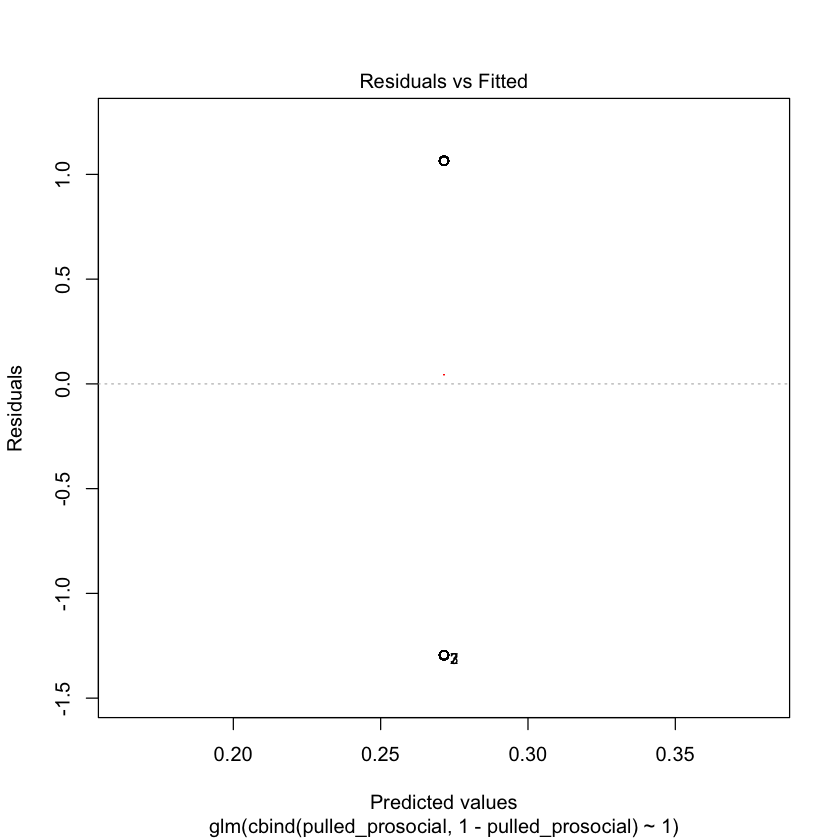

hat values (leverages) are all = 0.001984127
 and there are no factor predictors; no plot no. 5


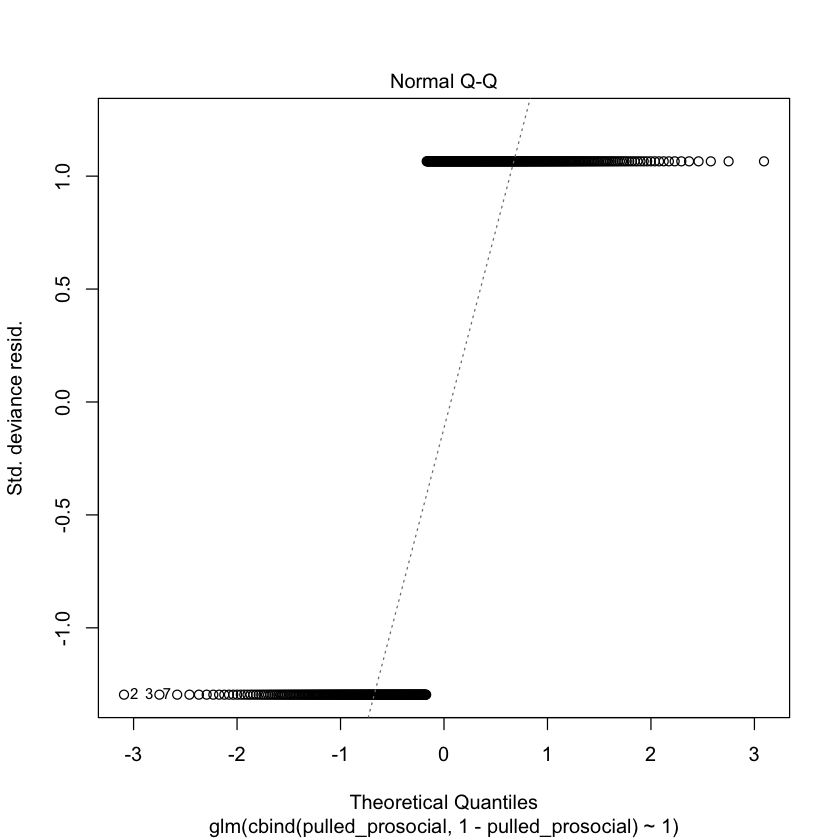

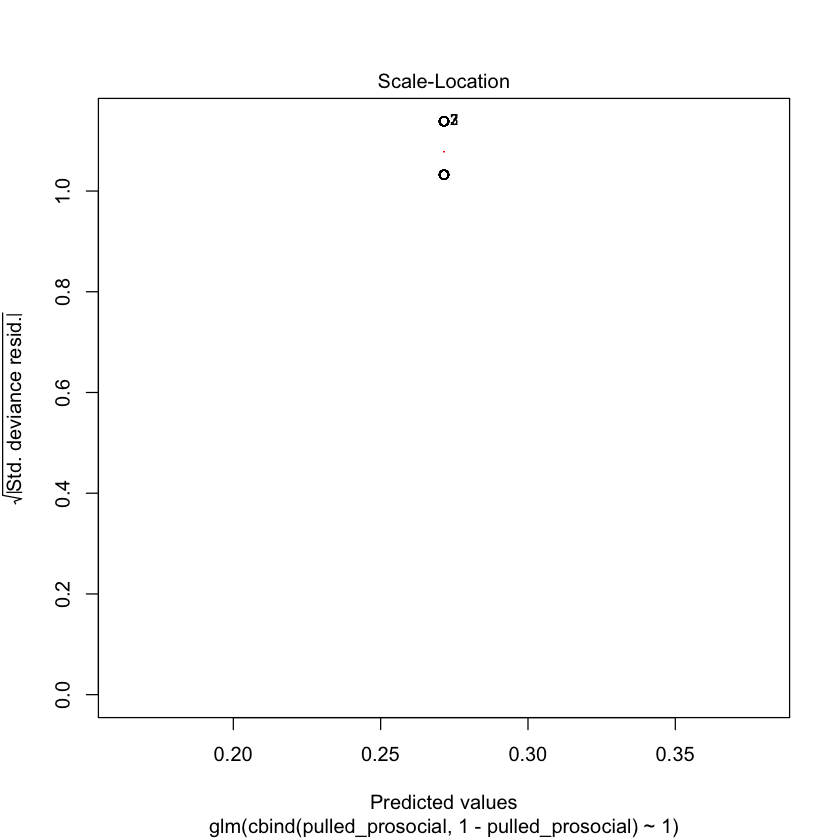

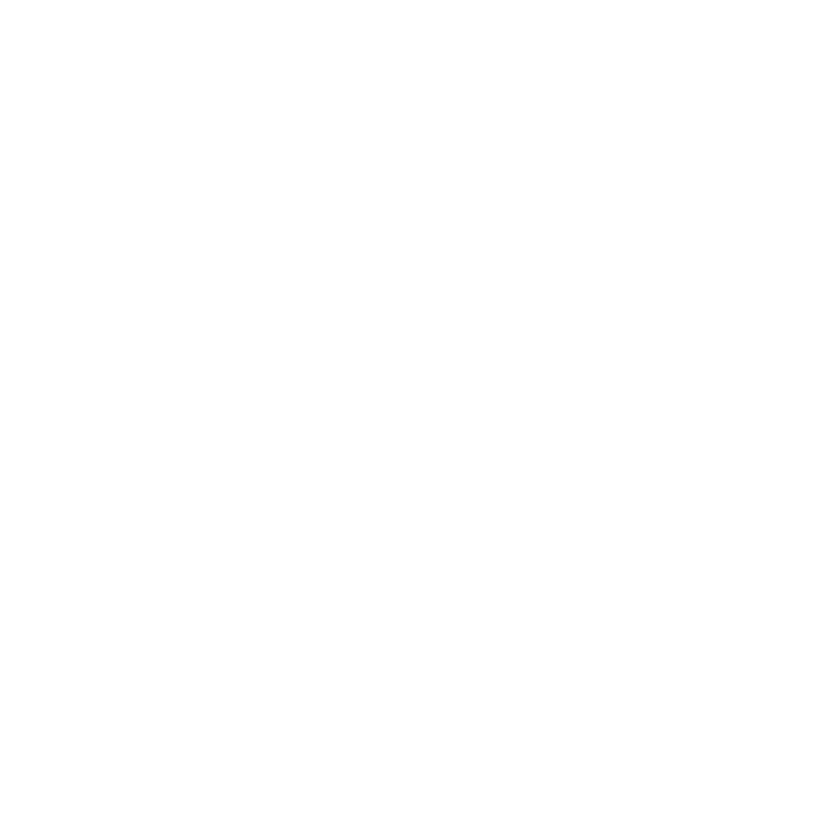

In [368]:
plot(data.bmodel3.step)

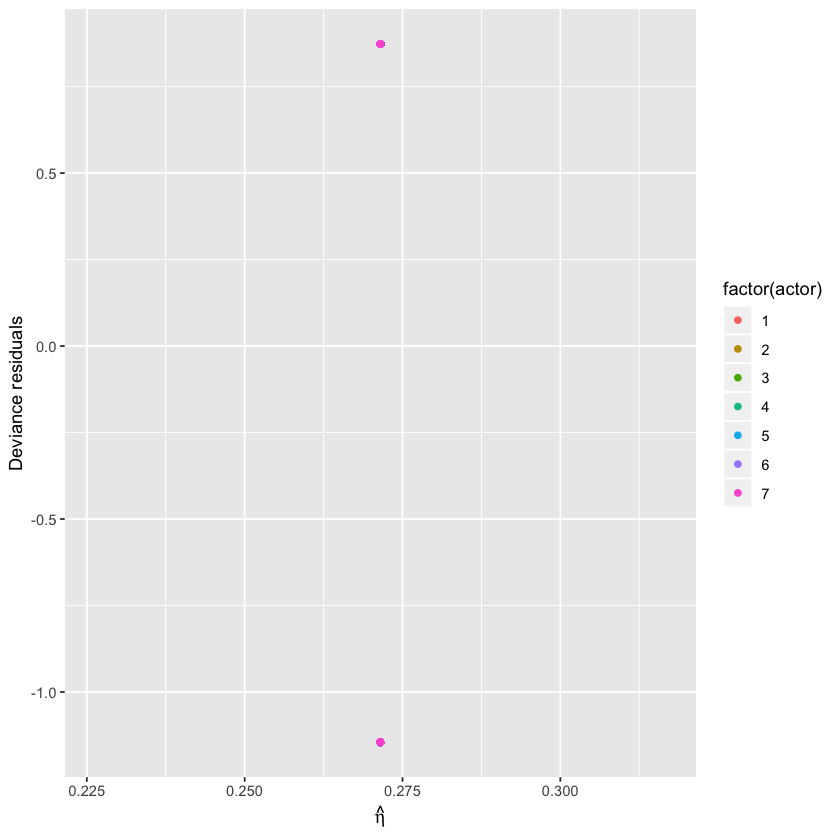

In [369]:
# Check residuals
ggplot(data = data,
       aes(x = predict(data.bmodel1.step, type="link", data=data), 
       y = residuals(data.bmodel1.step, data=data, type="pearson"), 
       colour=factor(actor),
       group=factor(actor))) + 
       geom_point() +
       xlab(expression(hat(eta))) +
       ylab("Deviance residuals")

### Conf Int

In [371]:
# Check conf interval (link)
critval <- 1.96 ## approx 95% CI
upr <- data.bmodel3.step.predict$fit + (critval * data.bmodel3.step.predict$se.fit)
lwr <- data.bmodel3.step.predict$fit - (critval * data.bmodel3.step.predict$se.fit)
fit <- data.bmodel3.step.predict$fit
distinct(data.frame(upr, fit, lwr))

upr,fit,lwr
0.4477187,0.2714967,0.09527477


In [372]:
# Check conf interval (response)
f = data.bmodel3$family$linkinv
distinct(data.frame(f(upr), f(fit), f(lwr)))

f.upr.,f.fit.,f.lwr.
0.6100967,0.5674603,0.5238007


### Overdispersion

In [373]:
# Check overdispersion
# Estimate Phi
n = dim(data)[1]
p = 2
(data.bmodel3.step.phihat = sum(residuals(data.bmodel3.step, type = "pearson")^2)/(n-p))
# The value is exactly 1, so no overdispersion

[1] 1.003984

## Independent model

In [243]:
## Fit the model
# The binomial model (full interaction)
# Try with all factors, (not including pulled_left as it's not something we want to study)
data.bmodel2 = glm(cbind(pulled_prosocial, 1-pulled_prosocial)~factor(actor)+
                  factor(condition)+factor(prosoc_left), data=data, 
                  family = "binomial")
summary(data.bmodel2)


Call:
glm(formula = cbind(pulled_prosocial, 1 - pulled_prosocial) ~ 
    factor(actor) + factor(condition) + factor(prosoc_left), 
    family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5788  -1.2125   0.8593   1.0758   1.3943  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           8.227e-02  2.750e-01   0.299 0.764827    
factor(actor)2       -4.646e-01  3.423e-01  -1.357 0.174751    
factor(actor)3        6.041e-02  3.476e-01   0.174 0.862038    
factor(actor)4        6.041e-02  3.476e-01   0.174 0.862038    
factor(actor)5        3.128e-16  3.464e-01   0.000 1.000000    
factor(actor)6       -5.790e-01  3.426e-01  -1.690 0.091071 .  
factor(actor)7       -3.502e-01  3.426e-01  -1.022 0.306626    
factor(condition)1    1.011e-01  1.837e-01   0.551 0.581851    
factor(prosoc_left)1  6.635e-01  1.840e-01   3.606 0.000311 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 

In [244]:
data.bmodel2.step = step(data.bmodel2)
summary(data.bmodel2.step)

Start:  AIC=686.48
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ factor(actor) + 
    factor(condition) + factor(prosoc_left)

                      Df Deviance    AIC
- factor(actor)        6   676.20 682.20
- factor(condition)    1   668.79 684.79
<none>                     668.48 686.48
- factor(prosoc_left)  1   681.69 697.69

Step:  AIC=682.2
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ factor(condition) + 
    factor(prosoc_left)

                      Df Deviance   AIC
- factor(condition)    1    676.5 680.5
<none>                      676.2 682.2
- factor(prosoc_left)  1    689.2 693.2

Step:  AIC=680.5
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ factor(prosoc_left)

                      Df Deviance    AIC
<none>                     676.50 680.50
- factor(prosoc_left)  1   689.49 691.49



Call:
glm(formula = cbind(pulled_prosocial, 1 - pulled_prosocial) ~ 
    factor(prosoc_left), family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4428  -1.1572   0.9335   0.9335   1.1977  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.04763    0.12602  -0.378 0.705484    
factor(prosoc_left)1  0.65274    0.18235   3.580 0.000344 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 689.49  on 503  degrees of freedom
Residual deviance: 676.50  on 502  degrees of freedom
AIC: 680.5

Number of Fisher Scoring iterations: 4


### Mean

In [245]:
# Check mean
data.bmodel2.step.predict = predict(data.bmodel2.step, type="link", se.fit=TRUE)

### Residual

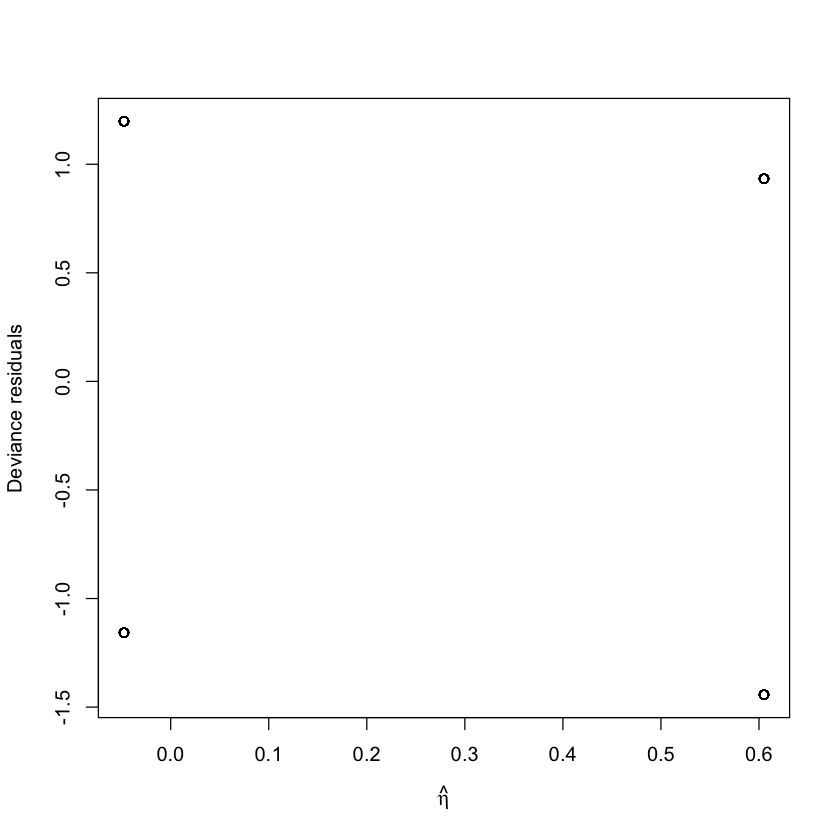

In [263]:
plot(residuals(data.bmodel2.step) ~ predict(data.bmodel2.step, type="link"),
     xlab=expression(hat(eta)), ylab="Deviance residuals",)

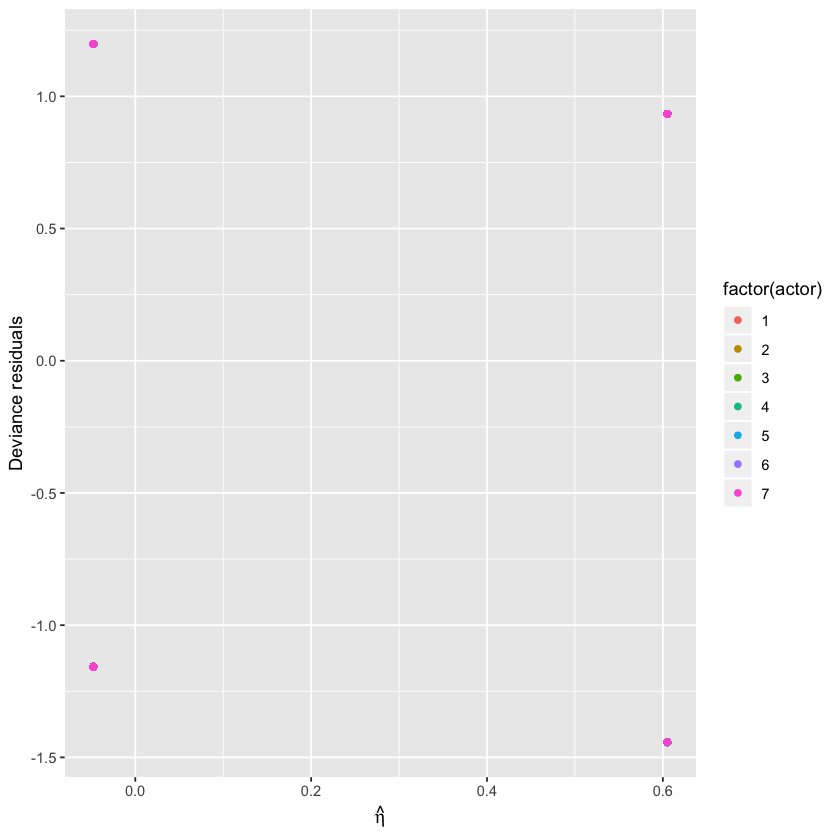

In [270]:
# Check residuals
ggplot(data = data,
       aes(x = predict(data.bmodel2.step, type="link", data=data), 
       y = residuals(data.bmodel2.step, data=data), 
       colour=factor(actor),
       group=factor(actor))) + 
       geom_point() +
       xlab(expression(hat(eta))) +
       ylab("Deviance residuals")

### Conf Int

In [230]:
# Check conf interval (link)
critval <- 1.96 ## approx 95% CI
upr <- data.bmodel2.step.predict$fit + (critval * data.bmodel2.step.predict$se.fit)
lwr <- data.bmodel2.step.predict$fit - (critval * data.bmodel2.step.predict$se.fit)
fit <- data.bmodel2.step.predict$fit
distinct(data.frame(upr, fit, lwr))
# Check conf interval (response)
f = data.bmodel2$family$linkinv
distinct(data.frame(f(upr), f(fit), f(lwr)))


upr,fit,lwr
0.1993788,-0.04762805,-0.2946349
0.8634395,0.60511383,0.3467882


f.upr.,f.fit.,f.lwr.
0.5496802,0.4880952,0.4268696
0.7033788,0.6468254,0.5858385


### Overdispersion

[1] 1.003984

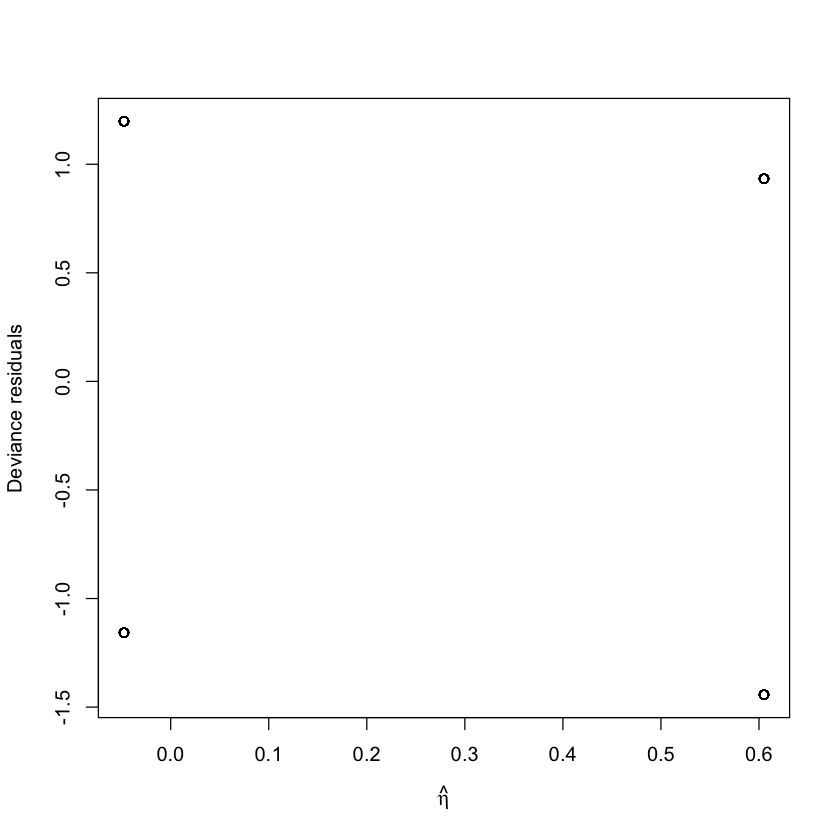

In [232]:
# Check residuals
plot(residuals(data.bmodel2.step) ~ predict(data.bmodel2.step, type="link"),
     xlab=expression(hat(eta)), ylab="Deviance residuals")
# Check overdispersion
# Estimate Phi
n = dim(data)[1]
p = 2
(data.bmodel2.step.phihat = sum(residuals(data.bmodel2.step, type = "pearson")^2)/(n-p))
# The value is exactly 1, so no overdispersion

## Removing (outlier) subjects

In [35]:
## Fit the model
# The binomial model (full interaction)
# Try with all factors, (not including pulled_left as it's not something we want to study)
data.subset = subset(data, !data$actor %in% c(2, 5, 7))
data.bmodel4 = glm(cbind(pulled_prosocial, 1-pulled_prosocial)~factor(actor)*factor(condition), data=data.subset, 
                  family = "binomial")
summary(data.bmodel4)


Call:
glm(formula = cbind(pulled_prosocial, 1 - pulled_prosocial) ~ 
    factor(actor) * factor(condition), family = "binomial", data = data.subset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4823  -1.3232   0.9005   1.0383   1.3232  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)
(Intercept)                         0.3365     0.3381   0.995    0.320
factor(actor)3                      0.3567     0.4892   0.729    0.466
factor(actor)4                      0.0000     0.4781   0.000    1.000
factor(actor)6                     -0.6729     0.4781  -1.408    0.159
factor(condition)1                  0.2341     0.4844   0.483    0.629
factor(actor)3:factor(condition)1  -0.5907     0.6885  -0.858    0.391
factor(actor)4:factor(condition)1   0.1226     0.6885   0.178    0.859
factor(actor)6:factor(condition)1   0.2136     0.6785   0.315    0.753

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 391.

In [36]:
data.bmodel4.step = step(data.bmodel4)
summary(data.bmodel4.step)

Start:  AIC=400.15
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ factor(actor) * 
    factor(condition)

                                  Df Deviance    AIC
- factor(actor):factor(condition)  3   385.83 395.83
<none>                                 384.15 400.15

Step:  AIC=395.83
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ factor(actor) + 
    factor(condition)

                    Df Deviance    AIC
- factor(condition)  1   386.35 394.35
- factor(actor)      3   390.70 394.70
<none>                   385.83 395.83

Step:  AIC=394.35
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ factor(actor)

                Df Deviance    AIC
- factor(actor)  3   391.22 393.22
<none>               386.35 394.35

Step:  AIC=393.22
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ 1




Call:
glm(formula = cbind(pulled_prosocial, 1 - pulled_prosocial) ~ 
    1, family = "binomial", data = data.subset)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.323  -1.323   1.038   1.038   1.038  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   0.3365     0.1195   2.815  0.00488 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 391.22  on 287  degrees of freedom
Residual deviance: 391.22  on 287  degrees of freedom
AIC: 393.22

Number of Fisher Scoring iterations: 4


### Mean

In [366]:
# Check mean
data.bmodel3.step.predict = predict(data.bmodel3.step, type="link", se.fit=TRUE)

### Residual

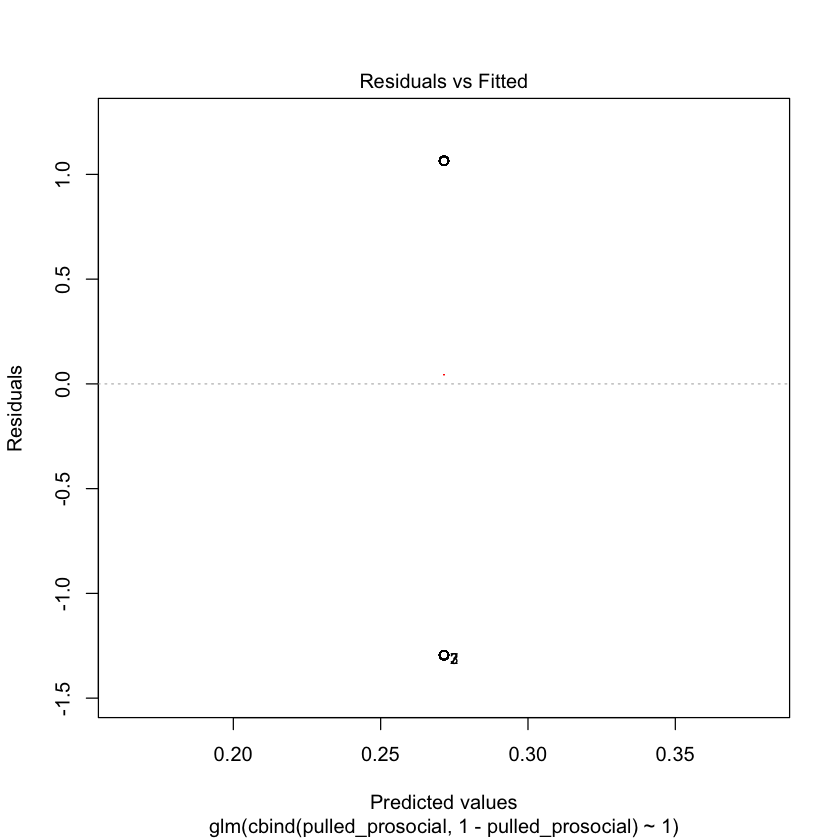

hat values (leverages) are all = 0.001984127
 and there are no factor predictors; no plot no. 5


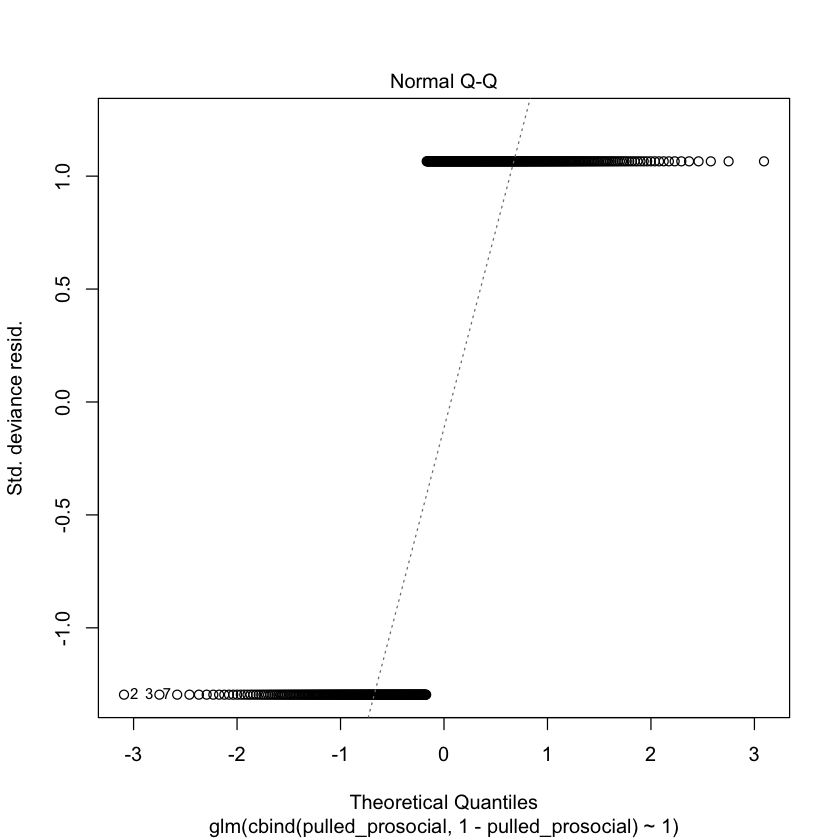

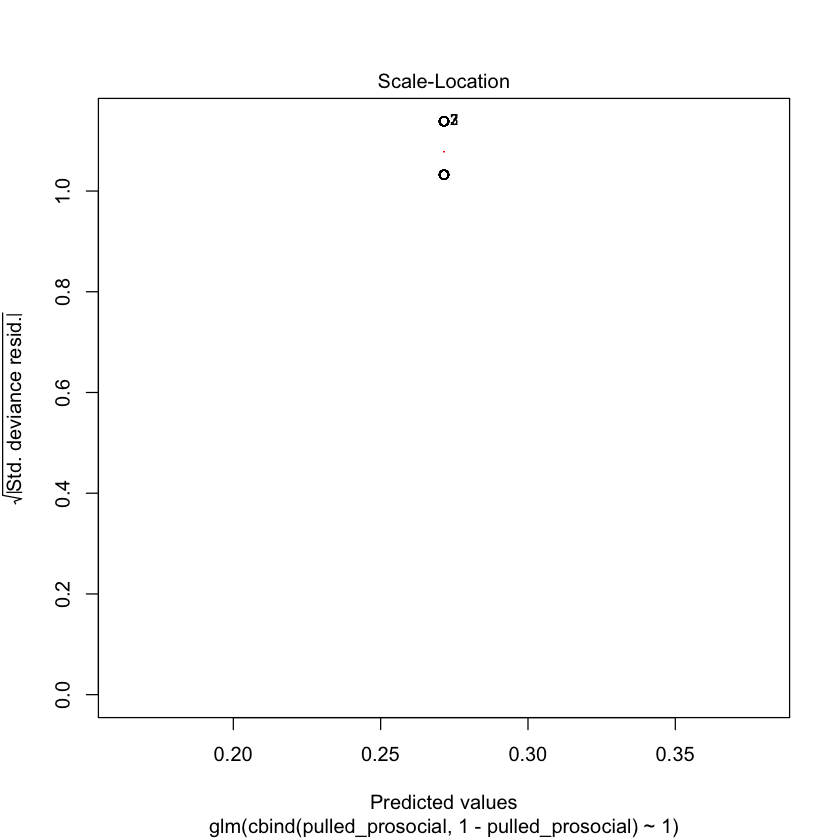

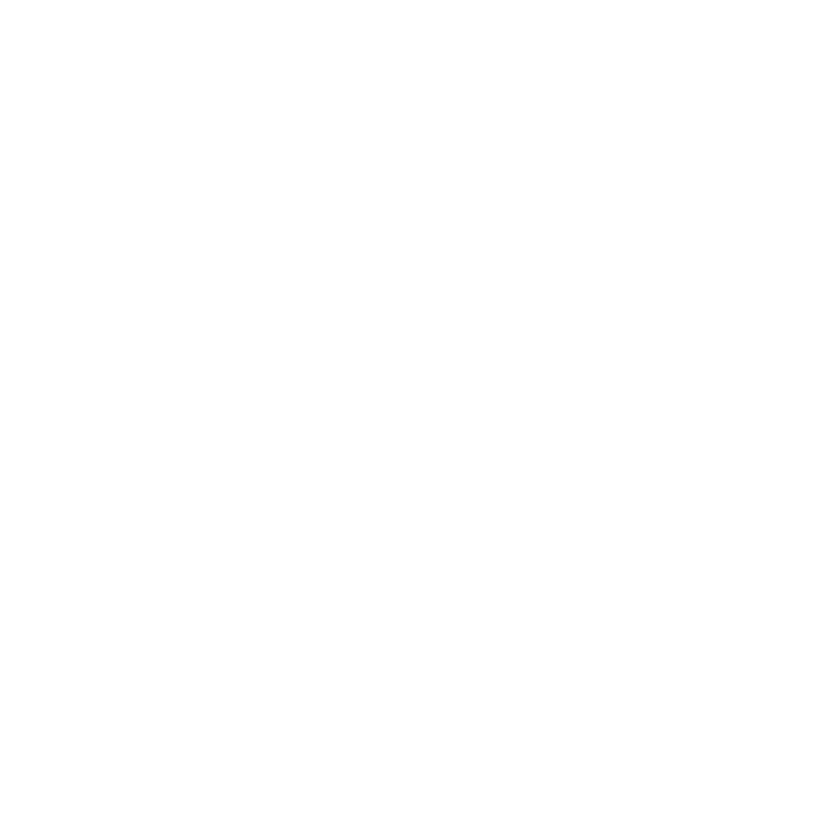

In [368]:
plot(data.bmodel3.step)

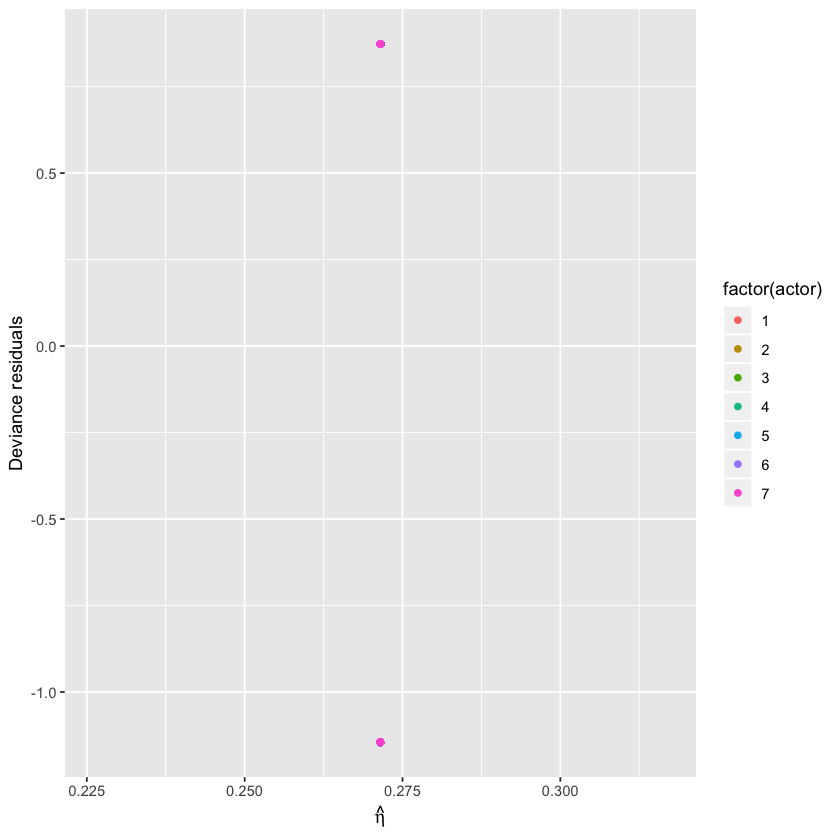

In [369]:
# Check residuals
ggplot(data = data,
       aes(x = predict(data.bmodel1.step, type="link", data=data), 
       y = residuals(data.bmodel1.step, data=data, type="pearson"), 
       colour=factor(actor),
       group=factor(actor))) + 
       geom_point() +
       xlab(expression(hat(eta))) +
       ylab("Deviance residuals")

### Conf Int

In [371]:
# Check conf interval (link)
critval <- 1.96 ## approx 95% CI
upr <- data.bmodel3.step.predict$fit + (critval * data.bmodel3.step.predict$se.fit)
lwr <- data.bmodel3.step.predict$fit - (critval * data.bmodel3.step.predict$se.fit)
fit <- data.bmodel3.step.predict$fit
distinct(data.frame(upr, fit, lwr))

upr,fit,lwr
0.4477187,0.2714967,0.09527477


In [372]:
# Check conf interval (response)
f = data.bmodel3$family$linkinv
distinct(data.frame(f(upr), f(fit), f(lwr)))

f.upr.,f.fit.,f.lwr.
0.6100967,0.5674603,0.5238007


### Overdispersion

In [373]:
# Check overdispersion
# Estimate Phi
n = dim(data)[1]
p = 2
(data.bmodel3.step.phihat = sum(residuals(data.bmodel3.step, type = "pearson")^2)/(n-p))
# The value is exactly 1, so no overdispersion

[1] 1.003984

## Independent model

In [243]:
## Fit the model
# The binomial model (full interaction)
# Try with all factors, (not including pulled_left as it's not something we want to study)
data.bmodel2 = glm(cbind(pulled_prosocial, 1-pulled_prosocial)~factor(actor)+
                  factor(condition)+factor(prosoc_left), data=data, 
                  family = "binomial")
summary(data.bmodel2)


Call:
glm(formula = cbind(pulled_prosocial, 1 - pulled_prosocial) ~ 
    factor(actor) + factor(condition) + factor(prosoc_left), 
    family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5788  -1.2125   0.8593   1.0758   1.3943  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           8.227e-02  2.750e-01   0.299 0.764827    
factor(actor)2       -4.646e-01  3.423e-01  -1.357 0.174751    
factor(actor)3        6.041e-02  3.476e-01   0.174 0.862038    
factor(actor)4        6.041e-02  3.476e-01   0.174 0.862038    
factor(actor)5        3.128e-16  3.464e-01   0.000 1.000000    
factor(actor)6       -5.790e-01  3.426e-01  -1.690 0.091071 .  
factor(actor)7       -3.502e-01  3.426e-01  -1.022 0.306626    
factor(condition)1    1.011e-01  1.837e-01   0.551 0.581851    
factor(prosoc_left)1  6.635e-01  1.840e-01   3.606 0.000311 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 

In [244]:
data.bmodel2.step = step(data.bmodel2)
summary(data.bmodel2.step)

Start:  AIC=686.48
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ factor(actor) + 
    factor(condition) + factor(prosoc_left)

                      Df Deviance    AIC
- factor(actor)        6   676.20 682.20
- factor(condition)    1   668.79 684.79
<none>                     668.48 686.48
- factor(prosoc_left)  1   681.69 697.69

Step:  AIC=682.2
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ factor(condition) + 
    factor(prosoc_left)

                      Df Deviance   AIC
- factor(condition)    1    676.5 680.5
<none>                      676.2 682.2
- factor(prosoc_left)  1    689.2 693.2

Step:  AIC=680.5
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ factor(prosoc_left)

                      Df Deviance    AIC
<none>                     676.50 680.50
- factor(prosoc_left)  1   689.49 691.49



Call:
glm(formula = cbind(pulled_prosocial, 1 - pulled_prosocial) ~ 
    factor(prosoc_left), family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4428  -1.1572   0.9335   0.9335   1.1977  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.04763    0.12602  -0.378 0.705484    
factor(prosoc_left)1  0.65274    0.18235   3.580 0.000344 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 689.49  on 503  degrees of freedom
Residual deviance: 676.50  on 502  degrees of freedom
AIC: 680.5

Number of Fisher Scoring iterations: 4


### Mean

In [245]:
# Check mean
data.bmodel2.step.predict = predict(data.bmodel2.step, type="link", se.fit=TRUE)

### Residual

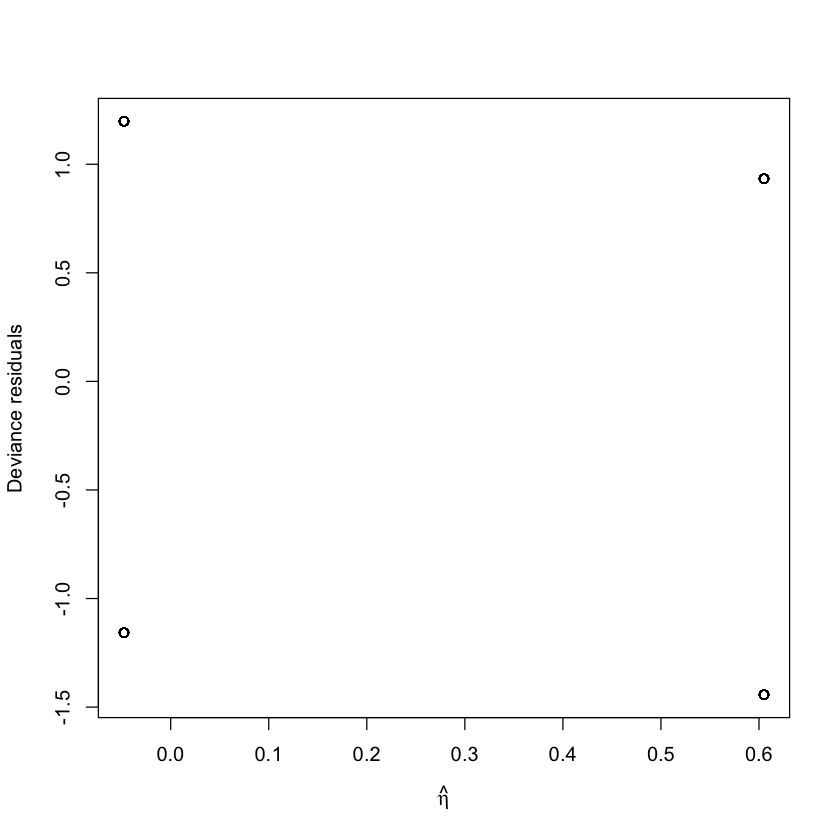

In [263]:
plot(residuals(data.bmodel2.step) ~ predict(data.bmodel2.step, type="link"),
     xlab=expression(hat(eta)), ylab="Deviance residuals",)

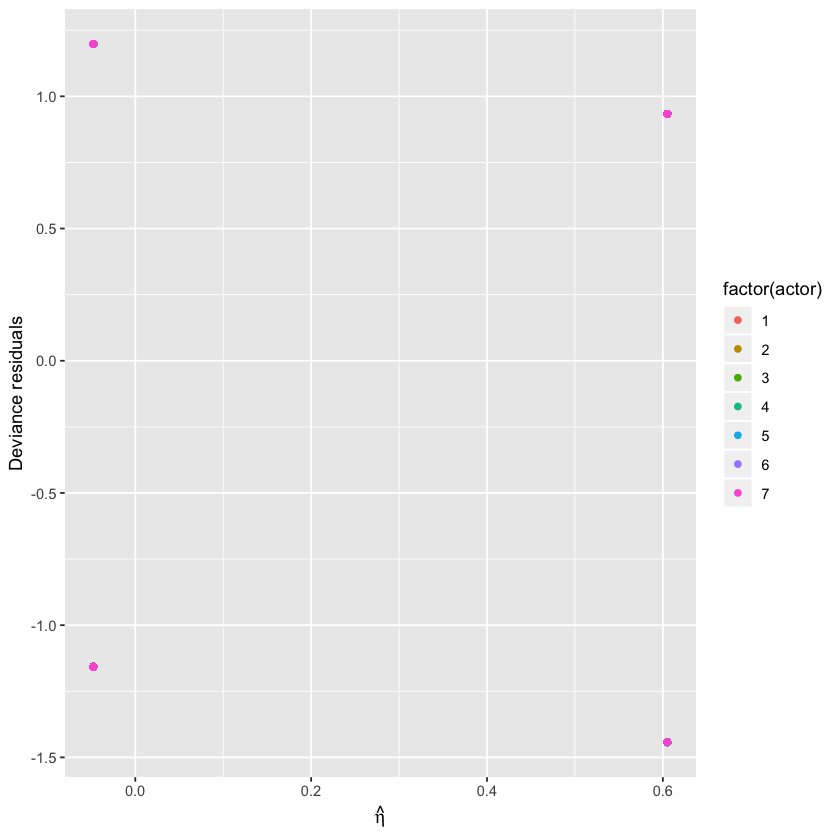

In [270]:
# Check residuals
ggplot(data = data,
       aes(x = predict(data.bmodel2.step, type="link", data=data), 
       y = residuals(data.bmodel2.step, data=data), 
       colour=factor(actor),
       group=factor(actor))) + 
       geom_point() +
       xlab(expression(hat(eta))) +
       ylab("Deviance residuals")

### Conf Int

In [230]:
# Check conf interval (link)
critval <- 1.96 ## approx 95% CI
upr <- data.bmodel2.step.predict$fit + (critval * data.bmodel2.step.predict$se.fit)
lwr <- data.bmodel2.step.predict$fit - (critval * data.bmodel2.step.predict$se.fit)
fit <- data.bmodel2.step.predict$fit
distinct(data.frame(upr, fit, lwr))
# Check conf interval (response)
f = data.bmodel2$family$linkinv
distinct(data.frame(f(upr), f(fit), f(lwr)))


upr,fit,lwr
0.1993788,-0.04762805,-0.2946349
0.8634395,0.60511383,0.3467882


f.upr.,f.fit.,f.lwr.
0.5496802,0.4880952,0.4268696
0.7033788,0.6468254,0.5858385


### Overdispersion

[1] 1.003984

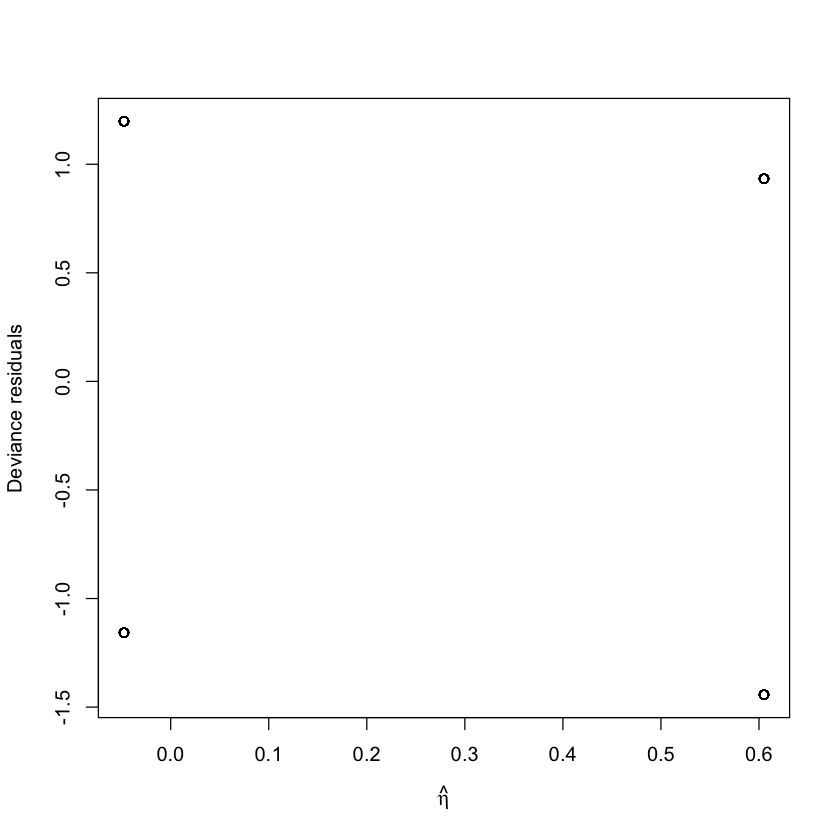

In [232]:
# Check residuals
plot(residuals(data.bmodel2.step) ~ predict(data.bmodel2.step, type="link"),
     xlab=expression(hat(eta)), ylab="Deviance residuals")
# Check overdispersion
# Estimate Phi
n = dim(data)[1]
p = 2
(data.bmodel2.step.phihat = sum(residuals(data.bmodel2.step, type = "pearson")^2)/(n-p))
# The value is exactly 1, so no overdispersion

# Divide prosoc_left and prosoc_right

In [332]:
colnames(data)

[1] "actor"            "condition"        "prosoc_left"      "pulled_left"     
[5] "pulled_prosocial" "const"

## left

In [339]:
## Fit the model
# The binomial model (full interaction)
# Try with all factors, (not including pulled_left as it's not something we want to study)
data.prosoc_left.bmodel1 = glm(cbind(pulled_prosocial, 1-pulled_prosocial)~factor(actor)*factor(condition), data=data[data$prosoc_left==1,], 
                  family = "binomial")
summary(data.prosoc_left.bmodel1)


Call:
glm(formula = cbind(pulled_prosocial, 1 - pulled_prosocial) ~ 
    factor(actor) * factor(condition), family = "binomial", data = data[data$prosoc_left == 
    1, ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.89302  -1.17741   0.00013   0.99245   1.48230  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)  
(Intercept)                       -3.831e-16  4.714e-01   0.000   1.0000  
factor(actor)2                     1.857e+01  1.537e+03   0.012   0.9904  
factor(actor)3                     4.520e-01  6.753e-01   0.669   0.5033  
factor(actor)4                     5.309e-17  6.667e-01   0.000   1.0000  
factor(actor)5                     2.231e-01  6.687e-01   0.334   0.7386  
factor(actor)6                     4.520e-01  6.753e-01   0.669   0.5033  
factor(actor)7                     1.609e+00  7.888e-01   2.040   0.0413 *
factor(condition)1                 2.231e-01  6.687e-01   0.334   0.7386  
factor(actor)

In [340]:
step(data.prosoc_left.bmodel1)

Start:  AIC=288.36
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ factor(actor) * 
    factor(condition)

                                  Df Deviance    AIC
- factor(actor):factor(condition)  6   267.76 283.76
<none>                                 260.36 288.36

Step:  AIC=283.76
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ factor(actor) + 
    factor(condition)

                    Df Deviance    AIC
- factor(condition)  1   267.95 281.95
<none>                   267.76 283.76
- factor(actor)      6   327.14 331.14

Step:  AIC=281.95
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ factor(actor)

                Df Deviance    AIC
<none>               267.95 281.95
- factor(actor)  6   327.29 329.29



Call:  glm(formula = cbind(pulled_prosocial, 1 - pulled_prosocial) ~ 
    factor(actor), family = "binomial", data = data[data$prosoc_left == 
    1, ])

Coefficients:
   (Intercept)  factor(actor)2  factor(actor)3  factor(actor)4  factor(actor)5  
     1.112e-01       1.845e+01      -2.225e-01      -2.225e-01       4.897e-16  
factor(actor)6  factor(actor)7  
     3.408e-01       2.287e+00  

Degrees of Freedom: 251 Total (i.e. Null);  245 Residual
Null Deviance:	    327.3 
Residual Deviance: 267.9 	AIC: 281.9

## right

In [343]:
## Fit the model
# The binomial model (full interaction)
# Try with all factors, (not including pulled_left as it's not something we want to study)
data.prosoc_right.bmodel1 = glm(cbind(pulled_prosocial, 1-pulled_prosocial)~factor(actor)*factor(condition), data=data[data$prosoc_left==0,], 
                  family = "binomial")
summary(data.prosoc_right.bmodel1)


Call:
glm(formula = cbind(pulled_prosocial, 1 - pulled_prosocial) ~ 
    factor(actor) * factor(condition), family = "binomial", data = data[data$prosoc_left == 
    0, ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.09629  -0.70896  -0.00013   0.80675   2.40432  

Coefficients:
                                    Estimate Std. Error z value Pr(>|z|)  
(Intercept)                        6.931e-01  5.000e-01   1.386    0.166  
factor(actor)2                    -1.926e+01  1.537e+03  -0.013    0.990  
factor(actor)3                     2.624e-01  7.259e-01   0.361    0.718  
factor(actor)4                     8.697e-17  7.071e-01   0.000    1.000  
factor(actor)5                     6.657e-16  7.071e-01   0.000    1.000  
factor(actor)6                    -1.946e+00  7.559e-01  -2.574    0.010 *
factor(actor)7                    -1.946e+00  7.559e-01  -2.574    0.010 *
factor(condition)1                 2.624e-01  7.259e-01   0.361    0.718  
factor(actor)

In [345]:
data.prosoc_right.bmodel1 = step(data.prosoc_right.bmodel1)
summary(data.prosoc_right.bmodel1)

Start:  AIC=259.93
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ factor(actor) * 
    factor(condition)

                                  Df Deviance    AIC
- factor(actor):factor(condition)  6   237.72 253.72
<none>                                 231.93 259.93

Step:  AIC=253.72
cbind(pulled_prosocial, 1 - pulled_prosocial) ~ factor(actor) + 
    factor(condition)

                    Df Deviance    AIC
<none>                   237.72 253.72
- factor(condition)  1   239.75 253.75
- factor(actor)      6   347.92 351.92



Call:
glm(formula = cbind(pulled_prosocial, 1 - pulled_prosocial) ~ 
    factor(actor) + factor(condition), family = "binomial", data = data[data$prosoc_left == 
    0, ])

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.84179  -0.60190  -0.00012   0.77784   2.09208  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         6.045e-01  3.918e-01   1.543  0.12291    
factor(actor)2     -1.941e+01  1.081e+03  -0.018  0.98567    
factor(actor)3      4.360e-01  5.427e-01   0.803  0.42169    
factor(actor)4      4.360e-01  5.427e-01   0.803  0.42169    
factor(actor)5      2.849e-16  5.145e-01   0.000  1.00000    
factor(actor)6     -1.533e+00  5.094e-01  -3.009  0.00262 ** 
factor(actor)7     -2.674e+00  6.063e-01  -4.410 1.03e-05 ***
factor(condition)1  4.530e-01  3.196e-01   1.417  0.15638    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    

In [ ]:
ggplot(tgc2, aes(x=dose, y=len, fill=supp)) + 
    geom_bar(position=position_dodge(), stat="identity") +
    geom_errorbar(aes(ymin=len-ci, ymax=len+ci),
                  width=.2,                    # Width of the error bars
                  position=position_dodge(.9))

In [49]:
## Gives count, mean, standard deviation, standard error of the mean, and confidence interval (default 95%).
##   data: a data frame.
##   measurevar: the name of a column that contains the variable to be summariezed
##   groupvars: a vector containing names of columns that contain grouping variables
##   na.rm: a boolean that indicates whether to ignore NA's
##   conf.interval: the percent range of the confidence interval (default is 95%)
summarySE <- function(data=NULL, measurevar, groupvars=NULL, na.rm=FALSE,
                      conf.interval=.95, .drop=TRUE) {
    library(plyr)

    # New version of length which can handle NA's: if na.rm==T, don't count them
    length2 <- function (x, na.rm=FALSE) {
        if (na.rm) sum(!is.na(x))
        else       length(x)
    }

    # This does the summary. For each group's data frame, return a vector with
    # N, mean, and sd
    datac <- ddply(data, groupvars, .drop=.drop,
      .fun = function(xx, col) {
        c(N    = length2(xx[[col]], na.rm=na.rm),
          mean = mean   (xx[[col]], na.rm=na.rm),
          sd   = sd     (xx[[col]], na.rm=na.rm)
        )
      },
      measurevar
    )

    # Rename the "mean" column    
    datac <- rename(datac, c("mean" = measurevar))

    datac$se <- datac$sd / sqrt(datac$N)  # Calculate standard error of the mean

    # Confidence interval multiplier for standard error
    # Calculate t-statistic for confidence interval: 
    # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
    ciMult <- qt(conf.interval/2 + .5, datac$N-1)
    datac$ci <- datac$se * ciMult

    return(datac)
}
## Norms the data within specified groups in a data frame; it normalizes each
## subject (identified by idvar) so that they have the same mean, within each group
## specified by betweenvars.
##   data: a data frame.
##   idvar: the name of a column that identifies each subject (or matched subjects)
##   measurevar: the name of a column that contains the variable to be summariezed
##   betweenvars: a vector containing names of columns that are between-subjects variables
##   na.rm: a boolean that indicates whether to ignore NA's
normDataWithin <- function(data=NULL, idvar, measurevar, betweenvars=NULL,
                           na.rm=FALSE, .drop=TRUE) {
    library(plyr)

    # Measure var on left, idvar + between vars on right of formula.
    data.subjMean <- ddply(data, c(idvar, betweenvars), .drop=.drop,
     .fun = function(xx, col, na.rm) {
        c(subjMean = mean(xx[,col], na.rm=na.rm))
      },
      measurevar,
      na.rm
    )

    # Put the subject means with original data
    data <- merge(data, data.subjMean)

    # Get the normalized data in a new column
    measureNormedVar <- paste(measurevar, "_norm", sep="")
    data[,measureNormedVar] <- data[,measurevar] - data[,"subjMean"] +
                               mean(data[,measurevar], na.rm=na.rm)

    # Remove this subject mean column
    data$subjMean <- NULL

    return(data)
}
## Summarizes data, handling within-subjects variables by removing inter-subject variability.
## It will still work if there are no within-S variables.
## Gives count, un-normed mean, normed mean (with same between-group mean),
##   standard deviation, standard error of the mean, and confidence interval.
## If there are within-subject variables, calculate adjusted values using method from Morey (2008).
##   data: a data frame.
##   measurevar: the name of a column that contains the variable to be summariezed
##   betweenvars: a vector containing names of columns that are between-subjects variables
##   withinvars: a vector containing names of columns that are within-subjects variables
##   idvar: the name of a column that identifies each subject (or matched subjects)
##   na.rm: a boolean that indicates whether to ignore NA's
##   conf.interval: the percent range of the confidence interval (default is 95%)
summarySEwithin <- function(data=NULL, measurevar, betweenvars=NULL, withinvars=NULL,
                            idvar=NULL, na.rm=FALSE, conf.interval=.95, .drop=TRUE) {

  # Ensure that the betweenvars and withinvars are factors
  factorvars <- vapply(data[, c(betweenvars, withinvars), drop=FALSE],
    FUN=is.factor, FUN.VALUE=logical(1))

  if (!all(factorvars)) {
    nonfactorvars <- names(factorvars)[!factorvars]
    message("Automatically converting the following non-factors to factors: ",
            paste(nonfactorvars, collapse = ", "))
    data[nonfactorvars] <- lapply(data[nonfactorvars], factor)
  }

  # Get the means from the un-normed data
  datac <- summarySE(data, measurevar, groupvars=c(betweenvars, withinvars),
                     na.rm=na.rm, conf.interval=conf.interval, .drop=.drop)

  # Drop all the unused columns (these will be calculated with normed data)
  datac$sd <- NULL
  datac$se <- NULL
  datac$ci <- NULL

  # Norm each subject's data
  ndata <- normDataWithin(data, idvar, measurevar, betweenvars, na.rm, .drop=.drop)

  # This is the name of the new column
  measurevar_n <- paste(measurevar, "_norm", sep="")

  # Collapse the normed data - now we can treat between and within vars the same
  ndatac <- summarySE(ndata, measurevar_n, groupvars=c(betweenvars, withinvars),
                      na.rm=na.rm, conf.interval=conf.interval, .drop=.drop)

  # Apply correction from Morey (2008) to the standard error and confidence interval
  #  Get the product of the number of conditions of within-S variables
  nWithinGroups    <- prod(vapply(ndatac[,withinvars, drop=FALSE], FUN=nlevels,
                           FUN.VALUE=numeric(1)))
  correctionFactor <- sqrt( nWithinGroups / (nWithinGroups-1) )

  # Apply the correction factor
  ndatac$sd <- ndatac$sd * correctionFactor
  ndatac$se <- ndatac$se * correctionFactor
  ndatac$ci <- ndatac$ci * correctionFactor

  # Combine the un-normed means with the normed results
  merge(datac, ndatac)
}

summarySEwithin(data, "pulled_prosocial", NULL, "condition", "actor")

Automatically converting the following non-factors to factors: condition


condition,N,pulled_prosocial,pulled_prosocial_norm,sd,se,ci
0,252,0.5555556,0.5555556,0.697211,0.04392017,0.08649902
1,252,0.5793651,0.5793651,0.695940,0.04384010,0.08634133


Automatically converting the following non-factors to factors: condition
ERROR while rich displaying an object: Error in factor(actor): object 'actor' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)

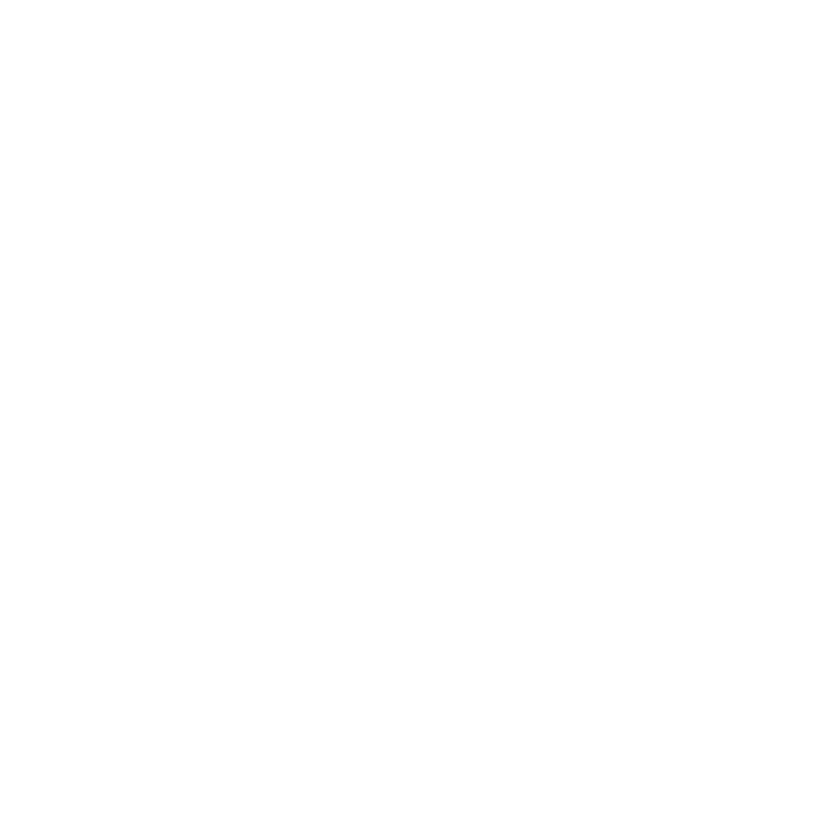

In [51]:
ggplot(data = summarySEwithin(data, "pulled_prosocial", NULL, "condition", "actor"),
       aes(x = interaction(factor(actor), factor(condition)), 
           y = mean(pulled_prosocial), 
           colour=factor(actor))) + 
    geom_bar(position=position_dodge(), stat="identity") +
    geom_errorbar(aes(ymin=pulled_prosocial-ci, ymax=pulled_prosocial+ci),
                  width=.2,                    # Width of the error bars
                  position=position_dodge(.9))